In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
N, Nt = 100, 200
x = np.linspace(0, 4,N)
t = np.linspace(0, 3, Nt)
u = 1.0

def init_rho(x):
    rho = np.ones((N)) * 0.25
    mask = x <= 1
    rho[mask] = 1.0
    return rho

rho = init_rho(x)

def advect_symmetric(t, x, u, rho):
    rho_mat = np.zeros((Nt, N))
    for n in range(1, Nt):
        rho_mat[n, :] = rho
        for i in range(1, N-1):
            if (i == 0):
                rho[i] = 1.0
            elif (i == (N-1)):
                rho[i] = 0.25
            else:
                rho[i] = rho[i] + (-u * (rho[i+1] - rho[i-1]) / (x[i+1] - x[i-1])) * (t[n+1] - t[n-1])
    return rho_mat

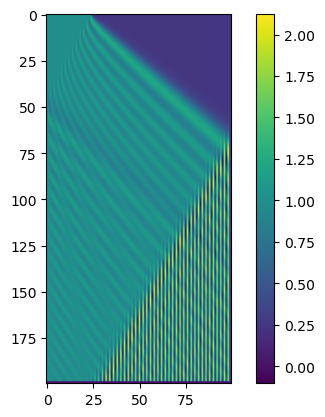

In [3]:
rho_mat = advect_symmetric(t, x, u, rho)
plt.imshow(rho_mat)
plt.colorbar()

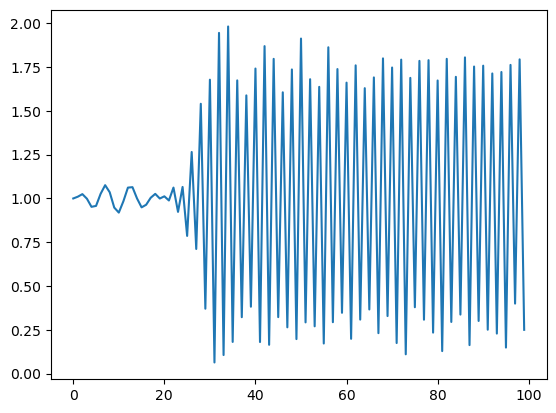

In [6]:
plt.plot(rho_mat[198, :])

In [7]:
N, Nt = 100, 2000
x = np.linspace(0, 4,N)
t = np.linspace(0, 3, Nt)
u = 1.0

def init_rho(x):
    rho = np.ones((N)) * 0.25
    mask = x <= 1
    rho[mask] = 1.0
    return rho

rho = init_rho(x)

def advect_symmetric(t, x, u, rho):
    rho_mat = np.zeros((Nt, N))
    for n in range(1, Nt-1):
        rho_mat[n, :] = rho
        for i in range(1, N-1):
            if (i == 0):
                rho[i] = 1.0
            elif (i == (N-1)):
                rho[i] = 0.25
            else:
                rho[i] = rho[i] + (-u * (rho[i+1] - rho[i-1]) / (x[i+1] - x[i-1])) * (t[n+1] - t[n-1])
    return rho_mat

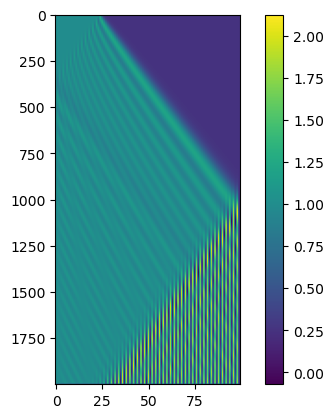

In [8]:
rho_mat = advect_symmetric(t, x, u, rho)
plt.imshow(rho_mat, aspect = 0.1)
plt.colorbar()

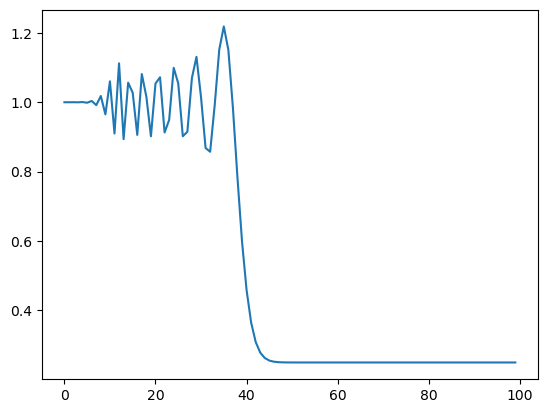

In [9]:
#(data,index=0,x=None,ymin=None,ymax=None,ylabel=None,idxnames=None,idxvals=None,idxformat='')
plt.plot(rho_mat[198, :])

In [15]:
N, Nt = 100, 2000
x = np.linspace(0, 4,N)
t = np.linspace(0, 3, Nt)
u = 1.0

def init_rho(x):
    rho = np.ones((N)) * 0.25
    mask = x <= 1
    rho[mask] = 1.0
    return rho

rho = init_rho(x)

def advect_upwind(t, x, u, rho):
    rho_mat = np.zeros((Nt, N))
    for n in range(1, Nt-1):
        rho_mat[n, :] = rho
        for i in range(1, N-1):
            if (i == 0):
                rho[i] = 1.0
            elif (i == (N-1)):
                rho[i] = 0.25
            else:
                rho[i] = rho[i] + (-u * (rho[i] - rho[i-1]) / (x[i+1] - x[i-1])) * (t[n+1] - t[n-1])
    return rho_mat

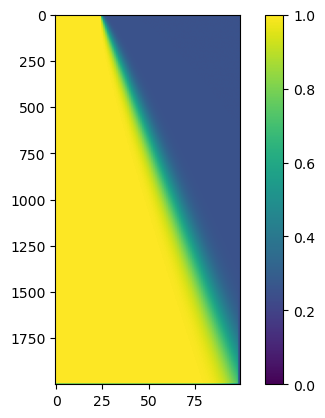

In [16]:
rho_mat = advect_upwind(t, x, u, rho)
plt.imshow(rho_mat, aspect = 0.1)
plt.colorbar()

# The problem is due to the fact we are not conserving the total mass! we have not coded the continuit equation